In [ ]:
from sklearn.datasets import make_circles
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import pandas as pd
# Make 1000 samples
n_samples = 1000

# Create circles
X, Y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values


[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

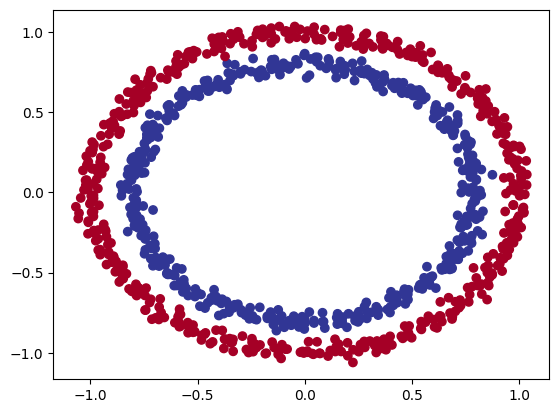

In [ ]:
plt.scatter(X[:,1],X[:,0],c=Y,
            cmap=plt.cm.RdYlBu)
print(Y)

In [ ]:
# xtr=torch.from_numpy(X[0:int(len(X)*.7)]).type(torch.float)
# ytr=torch.from_numpy(Y[0:int(len(Y)*.7)]).type(torch.float)
# xte=torch.from_numpy(X[int(len(X)*.7):0]).type(torch.float)
# yte=torch.from_numpy(Y[int(len(Y)*.7):0]).type(torch.float)

from sklearn.model_selection import train_test_split
# X = torch.from_numpy(X).type(torch.float)
# Y = torch.from_numpy(Y).type(torch.float)


xtr, xte, ytr,yte = train_test_split(X,
                                                    Y,
                                                    test_size=0.2, # 20% test, 80% train
                                               random_state=42)
xtr=torch.from_numpy(xtr).type(torch.float)
xte=torch.from_numpy(xte).type(torch.float)
ytr=torch.from_numpy(ytr).type(torch.float)
yte=torch.from_numpy(yte).type(torch.float)

class circle(nn.Module):
  def __init__(self):
    super().__init__()
    self.l=nn.Sequential(
        nn.Linear(in_features=2,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=1),

    )
    # self.layer_1 = nn.Linear(in_features=2, out_features=10)
    # self.layer_2 = nn.Linear(in_features=10, out_features=10)
    # self.layer_3 = nn.Linear(in_features=10, out_features=1)
    # self.relu = nn.ReLU()
  def forward(self,x:torch.tensor)->torch.tensor:
    # return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    return self.l(x)
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# m=nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.ReLU(),
#     nn.Linear(in_features=5, out_features=1)
# )
m=circle()
l=nn.BCEWithLogitsLoss()
p=torch.optim.SGD(m.parameters(),lr=0.1)


0.6672375
epoch=0 , train loss=0.6672375202178955 , test loss=0.6732078790664673
0.6671218
0.6670056
0.6668885
0.66677034
0.66665196
0.6665331
0.66641366
0.6662935
0.66617227
0.6660507
epoch=10 , train loss=0.6660506725311279 , test loss=0.6723204255104065
0.66592795
0.6658051
0.6656818
0.6655582
0.6654344
0.6653104
0.66518575
0.6650608
0.6649356
0.6648102
epoch=20 , train loss=0.6648101806640625 , test loss=0.6714003682136536
0.66468424
0.66455764
0.6644304
0.66430306
0.6641752
0.664047
0.66391855
0.66379
0.6636605
0.66353065
epoch=30 , train loss=0.6635306477546692 , test loss=0.6704427599906921
0.6634007
0.66327035
0.66313916
0.6630077
0.6628758
0.66274315
0.66260993
0.6624768
0.66234326
0.66220933
epoch=40 , train loss=0.6622093319892883 , test loss=0.6694395542144775
0.66207445
0.6619391
0.66180307
0.6616664
0.66152894
0.66139066
0.66125226
0.6611134
0.6609739
0.6608337
epoch=50 , train loss=0.6608337163925171 , test loss=0.6683840751647949
0.66069293
0.66055155
0.66040933
0.66026

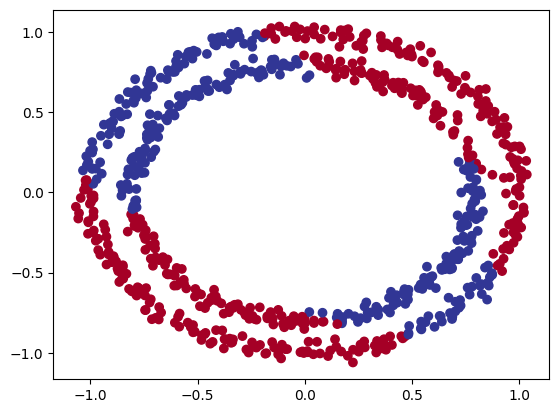

In [ ]:
epochs=100
trainloss=[]
testloss=[]
epochcount=[]
for epoch in range(epochs):
  m.train()
  a=m(xtr).squeeze()
  y=torch.round(torch.sigmoid(a))
  loss=l(a,ytr)
  p.zero_grad()
  loss.backward()
  p.step()
  m.eval()
  print(loss.detach().numpy())
  with torch.inference_mode():
    yp=m(xte).squeeze()
    ypr=torch.round(torch.sigmoid(yp))
    yl=l(yp,yte.type(torch.float))

    if epoch%10==0:
        epochcount.append(epoch)
        trainloss.append(loss.detach().numpy())
        testloss.append(yl.detach().numpy())
       # accuracy(ytr,ypr)
        print(f"epoch={epoch} , train loss={loss} , test loss={yl}")

plt.scatter(xtr[:,1].detach().numpy() ,xtr[:,0].detach().numpy() ,c=y.detach().numpy() , cmap=plt.cm.RdYlBu)
#plt.scatter(xte[:,1].detach().numpy() ,xte[:,0].detach().numpy() ,c=ypr.detach().numpy() ,cmap=plt.cm.RdYlBu)
#print(ypr)
#plt.scatter(yp.detach().numpy(),n.detach().numpy())
plt.plot(epochcount, trainloss, label="Train loss")
#plt.plot(epochcount, testloss, label="Test loss")
#plt.title("Training and test loss curves")
# plt.ylabel("Loss")
# plt.xlabel("Epochs")
# plt.legend();
